## FinBERT + Logistic Regression

use the FinBERT to generate the sentiment score

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('0-0-news501_unique_bert_with_scores_v2.csv')

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518984 entries, 0 to 518983
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   datetime     518984 non-null  int64  
 1   headline     518984 non-null  object 
 2   id           518984 non-null  int64  
 3   related      518984 non-null  object 
 4   summary      500453 non-null  object 
 5   symbol       518984 non-null  object 
 6   pos          518984 non-null  float64
 7   neg          518984 non-null  float64
 8   neu          518984 non-null  float64
 9   date         518984 non-null  object 
 10  sector       518984 non-null  object 
 11  senti_prob   518984 non-null  float64
 12  senti_score  518984 non-null  int64  
 13  rele_score   518984 non-null  int64  
 14  rep_score    518984 non-null  int64  
 15  km_label     518984 non-null  int64  
 16  h_label      518984 non-null  int64  
dtypes: float64(4), int64(7), object(6)
memory usage: 67.3+ MB


In [3]:
df.head()

,datetime,headline,id,related,summary,symbol,pos,neg,neu,date,sector,senti_prob,senti_score,rele_score,rep_score,km_label,h_label
0,1637167562,Cisco Shares Drop 6% as 2Q Guidance Misses Wal...,72603472,CSCO,By Maria Armental Cisco Systems Inc.'s stock s...,CSCO,0.008701,0.966435,0.024864,2021-11-17,Information Technology,-0.966435,-1,1,600,1,0
1,1637167253,Cisco forecasts downbeat profit as supply chai...,72603221,CSCO,Cisco Systems Inc forecast current-quarter pro...,CSCO,0.011739,0.972166,0.016095,2021-11-17,Information Technology,-0.972166,-1,1,600,1,0
2,1637166840,Cisco Raises Fiscal Year Profit Guidance Follo...,72602949,CSCO,By Maria Armental Cisco Systems Inc. raised it...,CSCO,0.247423,0.396269,0.356308,2021-11-17,Information Technology,-0.396269,-1,1,600,1,0
3,1637165827,Cisco: Fiscal Q1 Earnings Snapshot,72601655,CSCO,"SAN JOSE, Calif. _ Cisco Systems Inc. on Wedne...",CSCO,0.012847,0.925818,0.061335,2021-11-17,Information Technology,-0.925818,-1,1,600,1,0
4,1637165802,Cisco revenue misses estimates on lower demand...,72601731,CSCO,Cisco Systems Inc missed WallStreet expectatio...,CSCO,0.013548,0.972879,0.013573,2021-11-17,Information Technology,-0.972879,-1,1,200,0,2


In [4]:
df.isnull().sum()/df.shape[0]

datetime       0.000000
headline       0.000000
id             0.000000
related        0.000000
summary        0.035706
symbol         0.000000
pos            0.000000
neg            0.000000
neu            0.000000
date           0.000000
sector         0.000000
senti_prob     0.000000
senti_score    0.000000
rele_score     0.000000
rep_score      0.000000
km_label       0.000000
h_label        0.000000
dtype: float64

In [5]:
df.rele_score.value_counts()

1    264361
2    140790
4     69002
3     44831
Name: rele_score, dtype: int64

How many news per day?

<AxesSubplot:xlabel='date'>

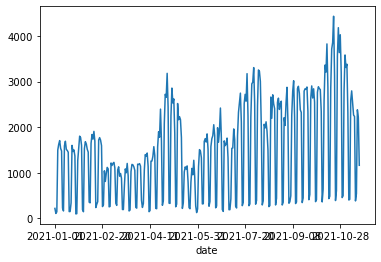

In [31]:
df.groupby(by=['date']).count().loc['2021-01-01':].headline.plot()

The data is obviously periodic.

In [32]:
df.groupby(by=['date']).count().index

Index(['2018-04-05', '2020-03-18', '2020-03-23', '2020-03-24', '2020-03-31',
       '2020-04-01', '2020-04-28', '2020-05-15', '2020-05-19', '2020-05-21',
       ...
       '2021-11-08', '2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12',
       '2021-11-13', '2021-11-14', '2021-11-15', '2021-11-16', '2021-11-17'],
      dtype='object', name='date', length=405)

In [33]:
import datetime as dt

In [36]:
news_count = df.groupby(by=['date']).count().headline

In [44]:
news_date = pd.to_datetime(df.groupby(by=['date']).count().index)

In [47]:
weekday = news_date.weekday

In [50]:
news_count_weekday = pd.DataFrame({'news_count': news_count.values, 'weekday': weekday})

<AxesSubplot:xlabel='weekday'>

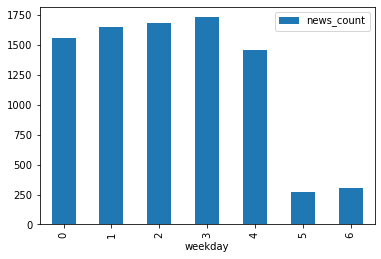

In [52]:
news_count_weekday.groupby('weekday').mean().plot(kind='bar')

the avarge news per day is about 1600. 

Text(0, 0.5, 'news count')

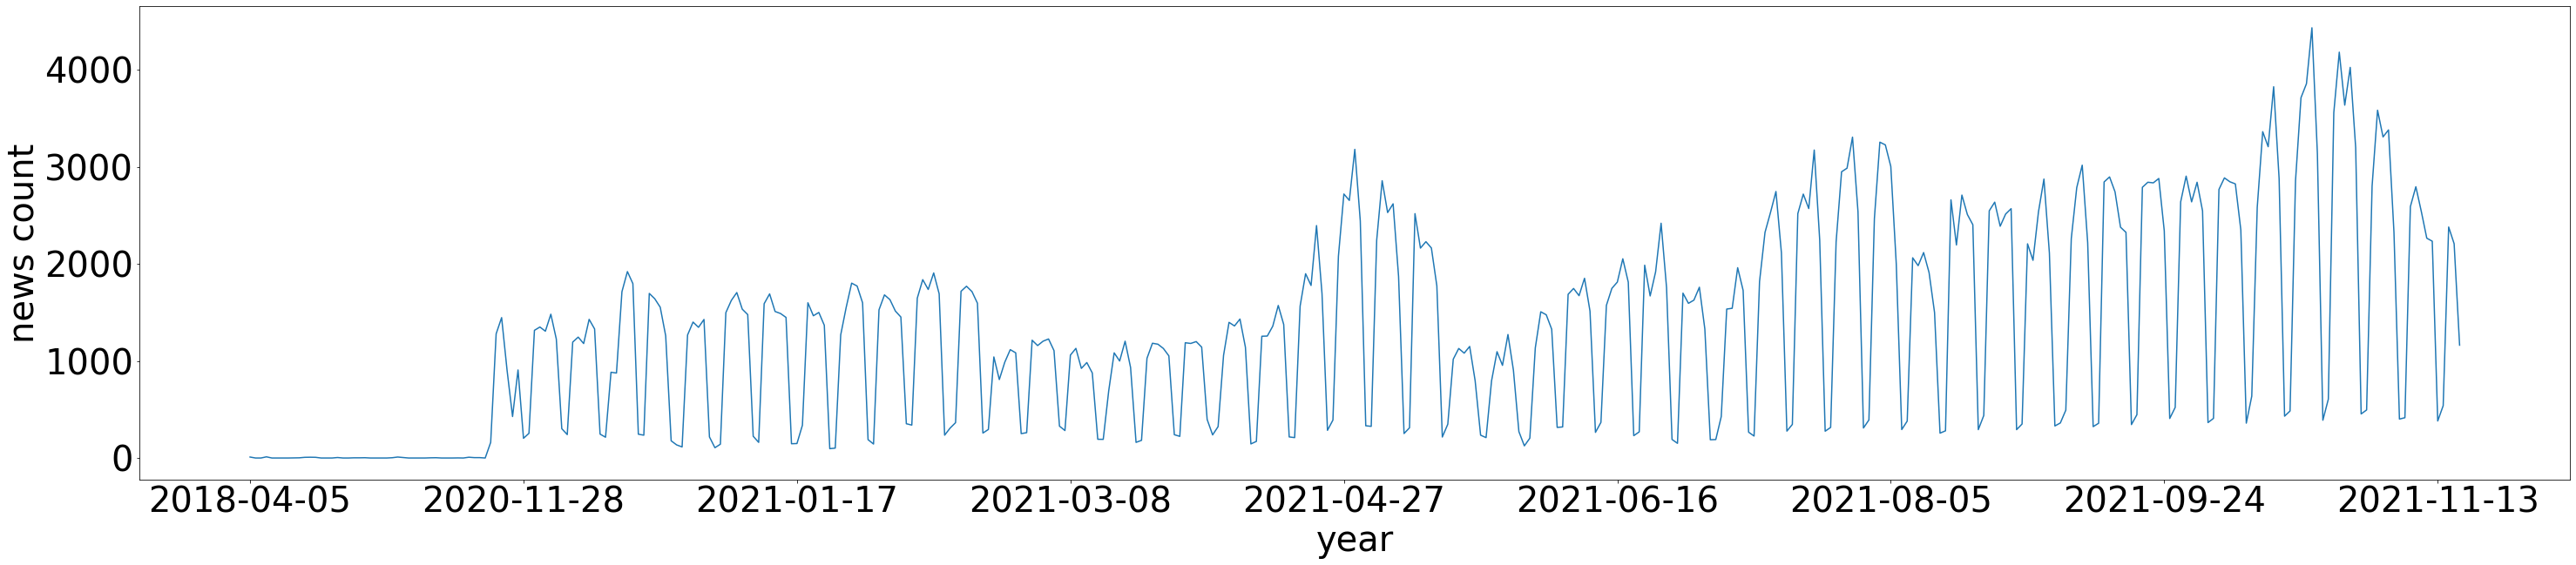

In [17]:
plt.figure(figsize = [50,10])
df.groupby(by=['date']).count().headline.plot()
plt.tick_params(labelsize = 40)
plt.xlabel('year', fontsize=40)
plt.ylabel('news count', fontsize=40)


Only few news a day before 2021 year, use data after 2021-01-01 to calculate the average daily news count

In [ ]:
df[df['date']>=]

<AxesSubplot:ylabel='Frequency'>

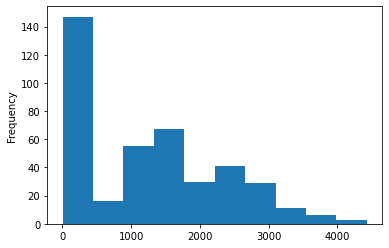

In [6]:
#how many news per Day?
df.groupby(by=['date']).count().headline.plot(kind='hist')

In [6]:
# select the news with score = 1
df0=df[df.rele_score ==1]

In [7]:
df0.shape

(264361, 17)

In [40]:
df0_mean = df0.groupby(['date','symbol']).mean()
df0_std = df0.groupby(['date','symbol']).std()
df0_median = df0.groupby(['date','symbol']).median()
df0_count = df0.groupby(['date','symbol']).count()

In [43]:
pos_mean = []
neg_mean = []
neu_mean = []
pos_median = []
neg_median = []
neu_median = []
num_count = []
stock_price = []
for i in range(len(df0_mean)):
    this_symbol = df0_mean.index[i][1]
    df_stock_price = pd.read_csv('../values/'+ this_symbol+'_value.csv')
    for j in range(len(df_stock_price.Date)):
        if df_stock_price.Date[j] == df0_mean.index[i][0]:
            pos_mean.append(df0_mean.pos[i])
            neg_mean.append(df0_mean.neg[i])
            neu_mean.append(df0_mean.neu[i])
            pos_median.append(df0_median.pos[i])
            neg_median.append(df0_median.neg[i])
            neu_median.append(df0_median.neu[i])
            num_count.append(df0_count.pos[i])
            stock_price.append(df_stock_price['Adj Close'][j])

In [47]:
df_all = pd.DataFrame(list(zip(pos_mean,neg_mean,neu_mean,pos_median,neg_median,neu_median,num_count,stock_price)),
            columns = ['Pos_mean','Neg_mean','Neu_mean','Pos_median','Neg_median','Neu_median','Num_count','Stock_price'])

In [49]:
df_all.to_csv('score_all_price_change.csv')

reload the dataset from the saved .CSV file

In [53]:
df_all=pd.read_csv('score_all_price_change.csv')

In [54]:
df_all.head()

,Unnamed: 0,Pos_mean,Neg_mean,Neu_mean,Pos_median,Neg_median,Neu_median,Num_count,Stock_price
0,0,0.028377,0.102115,0.869508,0.028377,0.102115,0.869508,1,0.144123
1,1,0.266343,0.008586,0.725070,0.266343,0.008586,0.725070,1,-0.025548
2,2,0.498944,0.045997,0.455059,0.412054,0.027944,0.569602,10,0.011904
3,3,0.689641,0.037138,0.273221,0.900462,0.035444,0.056188,4,0.082203
4,4,0.894049,0.074846,0.031105,0.894049,0.074846,0.031105,1,0.008522


<AxesSubplot:ylabel='Frequency'>

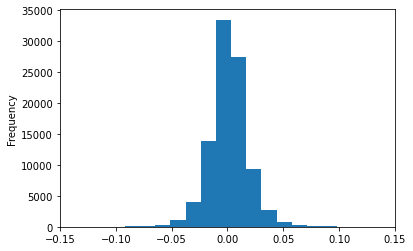

In [55]:
df_all.Stock_price.plot(kind='hist',bins = 50,xlim = (-0.15,0.15))

In [56]:
# select only the stock and date with price change greater than 3% either positive or negative.
df_all_train = df_all[df_all.Stock_price.abs()>=0.03]

In [57]:
df_all_train.head()

,Unnamed: 0,Pos_mean,Neg_mean,Neu_mean,Pos_median,Neg_median,Neu_median,Num_count,Stock_price
0,0,0.028377,0.102115,0.869508,0.028377,0.102115,0.869508,1,0.144123
3,3,0.689641,0.037138,0.273221,0.900462,0.035444,0.056188,4,0.082203
15,15,0.902018,0.068956,0.029026,0.902018,0.068956,0.029026,1,0.030044
18,18,0.689232,0.281759,0.029010,0.689232,0.281759,0.029010,1,0.048245
19,19,0.399898,0.056095,0.544008,0.343268,0.020424,0.637158,4,0.041911


In [58]:
target = df_all_train.pop('Stock_price')
# target_all = result_all.pop('Stock_price')


In [59]:
target_classification =target>=0.03

In [60]:
# check if the class is balanced
target_classification.mean()

0.5598934043970686

In [61]:
df_all_train.pop('Unnamed: 0')

0            0
3            3
15          15
18          18
19          19
         ...  
93845    93845
93846    93846
93851    93851
93862    93862
93868    93868
Name: Unnamed: 0, Length: 7505, dtype: int64

In [62]:
df_all_train.columns

Index(['Pos_mean', 'Neg_mean', 'Neu_mean', 'Pos_median', 'Neg_median',
       'Neu_median', 'Num_count'],
      dtype='object')

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

The same model from Xiaobai: split the data by date

In [64]:
X_train = df_all_train[1:5000]
X_test = df_all_train[5000:7500]
y_train = target_classification[1:5000]
y_test = target_classification[5000:7500]
X_train.pop('Num_count')
X_test.pop('Num_count')
poly = PolynomialFeatures(degree=3)
X_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)

model = linear_model.LogisticRegression(penalty='l1',solver='saga',max_iter=5000)

In [65]:
model.fit(X_, y_train)


print(precision_score(model.predict(X_test_),y_test))
print(recall_score(model.predict(X_test_),y_test))
print (roc_auc_score(y_test, model.decision_function(X_test_)))


0.8721590909090909
0.8258238063214526
0.890834425990676


In [74]:
import numpy as np

84

Feature: 0, Score: 2.47492
Feature: 1, Score: -7.56369
Feature: 2, Score: 0.70847
Feature: 3, Score: 4.05721
Feature: 4, Score: 0.50320
Feature: 5, Score: 3.78398
Feature: 6, Score: -2.70628
Feature: 7, Score: 4.73870
Feature: 8, Score: 3.73877
Feature: 9, Score: -4.49807
Feature: 10, Score: -0.33659
Feature: 11, Score: -4.16468
Feature: 12, Score: -1.37887
Feature: 13, Score: -0.68790
Feature: 14, Score: 0.22755


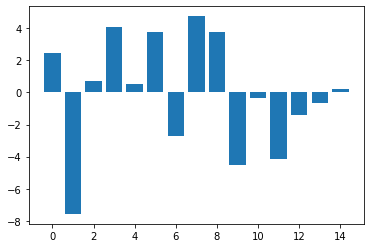

In [77]:
importance = model.coef_[0][np.abs(model.coef_[0])>0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [66]:
from sklearn.metrics import roc_curve
y_test_proba = model.predict_proba(X_test_)
fpr,tpr,threshold = roc_curve(y_test,y_test_proba[:,1])

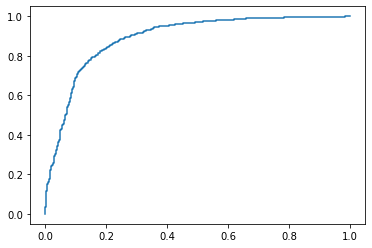

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr,tpr)

random split the data and compare the results

In [81]:
from sklearn.model_selection import train_test_split


In [85]:
X=df_all_train
# X.pop('Num_count')
y=target_classification
X_random = poly.fit_transform(X)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2022)

In [87]:
model_random = linear_model.LogisticRegression(penalty='l1',solver='saga',max_iter=5000)

In [88]:
model_random.fit(X_train,y_train)

LogisticRegression(max_iter=5000, penalty='l1', solver='saga')

In [89]:
print(precision_score(model_random.predict(X_test),y_test))
print(recall_score(model_random.predict(X_test),y_test))
print (roc_auc_score(y_test, model_random.decision_function(X_test)))

0.9173652694610779
0.8549107142857143
0.9218230206254159
